    The Notebook Title: StricklandMolly_ml.ipynb
    Author: Molly Strickland
[Clicklable link to github repository](https://github.com/MoStrick/datafun-07-ml-/tree/main)


    


## Part 1 - Chart a Straight Line


In [94]:
import matplotlib

### Convert temperature

In [95]:
c = lambda f: 5 / 9 * (f - 32)


### Create function to plot and dataframe properties (graph) to plot

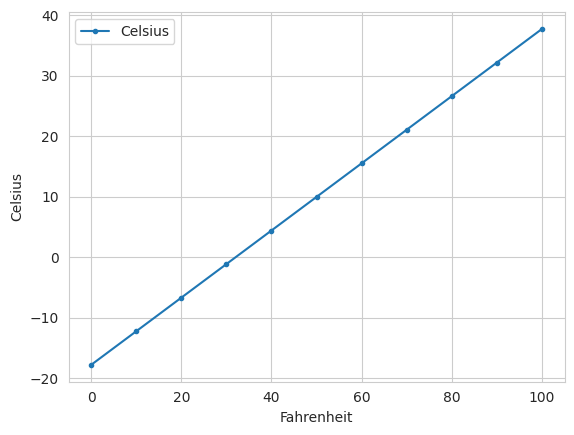

In [96]:
temps = [(f, c(f)) for f in range (0, 101,10)]
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit','Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius',style='.-')
y_label = axes.set_ylabel('Celsius')

# Part 2

### 2.1: Data Acquisition: Obtain the Data

We obtained the January average high temperatures for New York City from 1895 through 2018 from NOAA’s “Climate at a Glance” time series at: https://www.ncdc.noaa.gov/cag
OR file in Unit 10: ave_hi_nyc_jan_1895-2018.csv

In [97]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### 2.2: Data Inspection
View the beginning and end of your data

In [98]:
nyc_df.head()
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### 2.3: Data Cleaning

Rename Column

Check Data Type

Remove 01 from the dates to create just columns
    floor division performs integer division on every element of the series


In [99]:


nyc_df.columns = ['Date','Temperature','Anomaly']
nyc_df.head(3)

nyc_df.Date.dtype

nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### 2.4: Descriptive statistis for the data set
Set the precision option correctly:   pd.set_option('display.precision', 2)


In [100]:
pd.set_option('display.precision',2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### 2.5: Build the Model: Creating the linear regression equation (Scipy)

In [101]:
from scipy import stats
linear_regression=stats.linregress(x=nyc_df.Date,y=nyc_df.Temperature)

round(linear_regression.slope,5)

0.01477

In [102]:
round(linear_regression.intercept,5)

8.69499

### Interpreting the linear regression equation
The object returned by linregress contains the regression line's slope and y-intercept:


### 2.6: Predict future values
To predict temperature in 2019 and 1890, and 2024

In [103]:
round(linear_regression.slope*2019+linear_regression.intercept,4)

38.5184

In [104]:
round(linear_regression.slope*1890+linear_regression.intercept,4)

36.6129

In [105]:
round(linear_regression.slope*2024+linear_regression.intercept,4)

38.5922

# Interpretation

### 2.7: Visualizations- Create the scatterplot
Close the matplotlib window if you have not done so already, or it will use the existing window that already contains the graph


(20.0, 55.0)

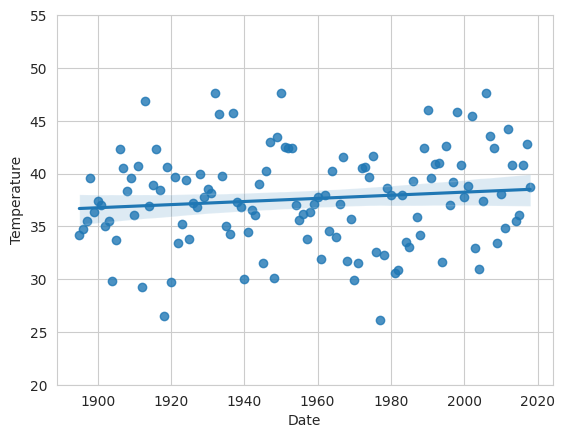

In [106]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date,y=nyc_df.Temperature)

axes.set_ylim(20,55)

# Observations




# Part 3